In [59]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram

In [4]:
df = pd.read_csv('../data/kandidater_data.csv').dropna()

In [94]:
clusterer = AgglomerativeClustering(n_clusters=None, distance_threshold=24)
clusters = clusterer.fit_predict(df[[str(i) for i in range(1, 26)]])
df['cluster'] = clusters

In [95]:
df.cluster.nunique()

14

In [43]:
# Apply t-SNE to the selected columns
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df[[str(i) for i in range(1, 26)]])

# Add the transformed coordinates to the existing dataframe
df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

In [34]:
colormap = {'A': '#A82721', 
            'O': '#EAC73E', 
            'V': '#254264', 
            'Ø': '#E6801A', 
            'I': '#3FB2BE', 
            'Å': '#2B8738', 
            'B': '#733280', 
            'F': '#E07EA8', 
            'C': '#96B226', 
            'D': '#127B7F', 
            'K': '#8B8474', 
            'Q': '#C49414', 
            'M': '#832B93', 
            'Æ': '#2C5877'}
df['PartyColor'] = df.CurrentPartyCode.map(colormap)

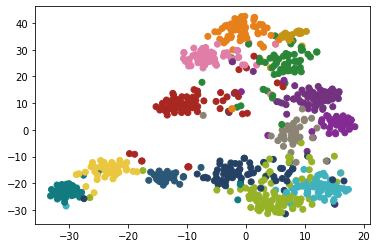

In [44]:
plt.scatter(df.tsne1, df.tsne2, color=df.PartyColor, label=df.CurrentPartyCode)

In [55]:
color_palette = sns.color_palette('Paired', 14)

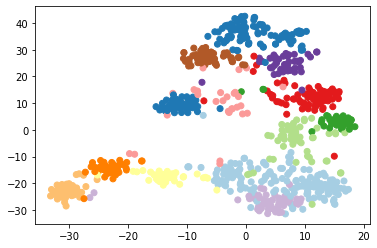

In [96]:
color = [color_palette[i] for i in df.cluster]
plt.scatter(df.tsne1, df.tsne2, color=color)

In [60]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

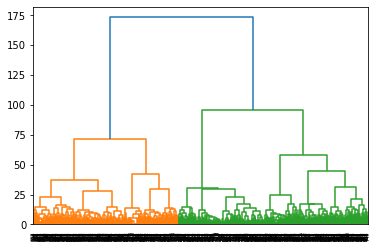

In [85]:
plot_dendrogram(clusterer, truncate_mode="level")